In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv("placement.csv")
df.head()

,cgpa package,Unnamed: 1
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [17]:
df.rename(columns={"cgpa package":"cgpa","Unnamed: 1":"package"},inplace=True)

In [18]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [36]:
x=df.iloc[:,:1]
y=df.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=52,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
pred=lr.predict(X_test)
pred.shape

(40,)

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [42]:
mae=mean_absolute_error(y_test,pred)

In [43]:
r2=r2_score(y_test,pred)

In [44]:
mse=mean_squared_error(y_test,pred)

Text(0.5, 1.0, 'Linear regression')

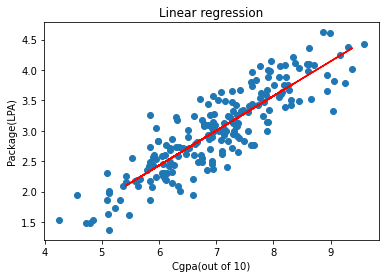

In [45]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(X_test,pred,color="red")
plt.xlabel("Cgpa(out of 10)")
plt.ylabel("Package(LPA)")
plt.title("Linear regression")

In [46]:
m=lr.coef_
b=lr.intercept_
print(m,b)

[0.57116808] -0.998083607807728


In [47]:
print("yhat=", m[0], "*X", "+", b)

yhat= 0.5711680795270541 *X + -0.998083607807728


In [48]:
print("MAE:",mae)
print("MSE:",mse)
print("RMSE",mse**0.5)
print("R2:",r2)
print("adjusted R2",1-((1-r2)*(X_test.shape[0]-1))/((X_test.shape[0]-1-1)))


MAE: 0.2980251880765335
MSE: 0.13585398069194085
RMSE 0.3685837499021638
R2: 0.6806384676456763
adjusted R2 0.6722342167942467


In [49]:
df.shape

(200, 2)

In [33]:
class mylr:
    def _int_(self):
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num=0
        den=0
        
        for i in range(X_train.shape[0]):
            num=num+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den=den+(X_train[i]-X_train.mean())**2  
        self.m=num/den
        self.b=y_train.mean()-((self.m)*X_train.mean())
    def predict(self,X_test):
        return (self.m*X_test+self.b)
        

In [34]:
LR=mylr()

In [35]:
LR.fit(X_train,y_train)

KeyError: 0